In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,classification_report
from sklearn.svm import SVR


In [2]:
# loading the dataset
df=pd.read_csv(r"C:\Users\gajra\OneDrive\Desktop\Airbnb_data - airbnb_data.csv")
df.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0


Essential Exploratry Data Anslysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
# summary statistics
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [6]:
# checking for null values
df.isnull().sum()                    

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

Filling required columns null values

In [8]:
df['bathrooms'].fillna(df['bathrooms'].median(),inplace=True)

C:\Users\gajra\AppData\Local\Temp\ipykernel_21860\4252283288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].median(),inplace=True)


In [9]:
df['review_scores_rating'].fillna(df['review_scores_rating'].median(),inplace=True)

C:\Users\gajra\AppData\Local\Temp\ipykernel_21860\3100365810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(df['review_scores_rating'].median(),inplace=True)


In [10]:
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['bedrooms'].fillna(df['bedrooms'].mean(),inplace=True)

C:\Users\gajra\AppData\Local\Temp\ipykernel_21860\3577388554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].mean(),inplace=True)


In [11]:
df['beds'].fillna(df['beds'].median(),inplace=True)

C:\Users\gajra\AppData\Local\Temp\ipykernel_21860\2799849481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['beds'].fillna(df['beds'].median(),inplace=True)


In [12]:
# checking for null values after filling them
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                     968
bedrooms                      0
beds                          0
dtype: int64

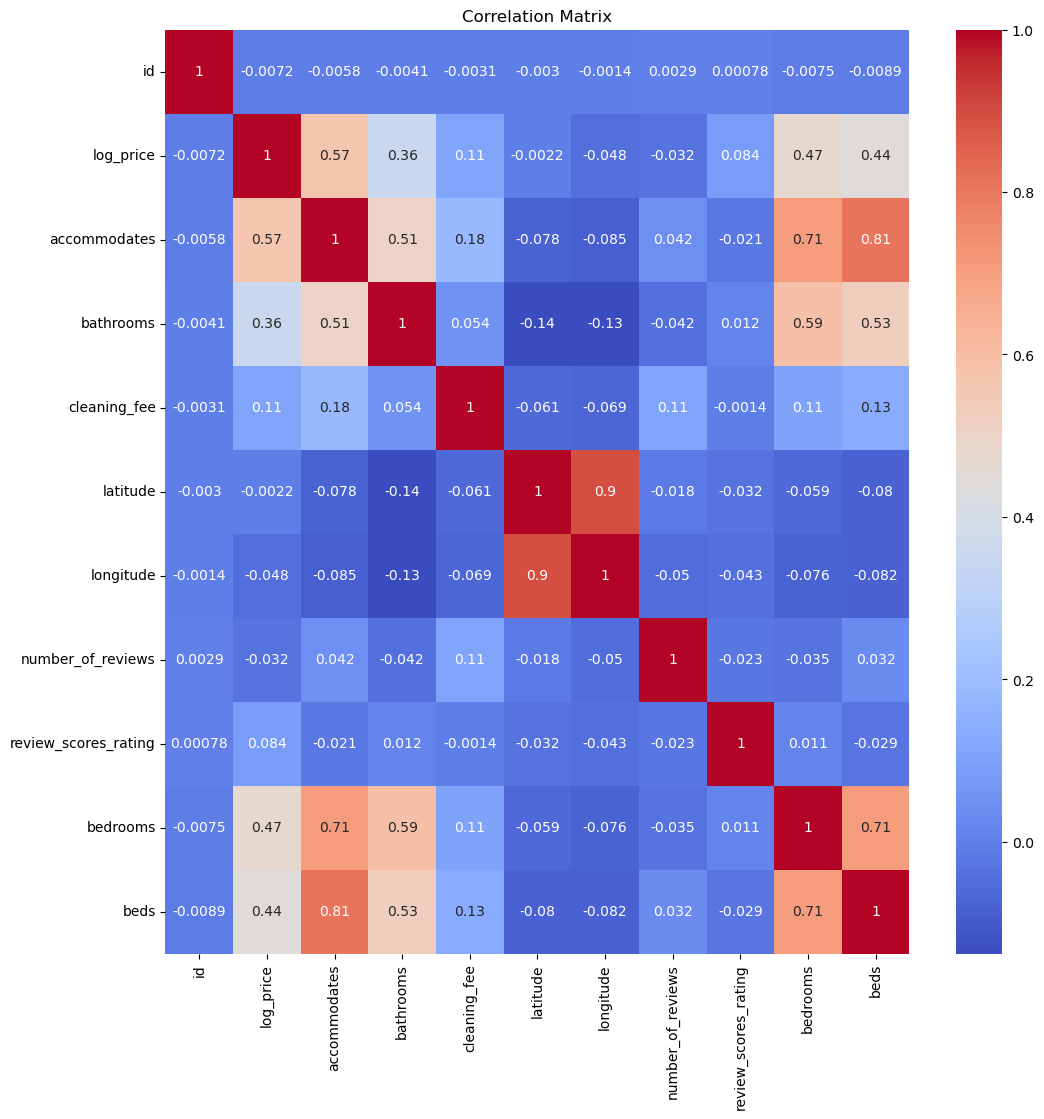

In [13]:
# Correlation matrix

num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
       num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

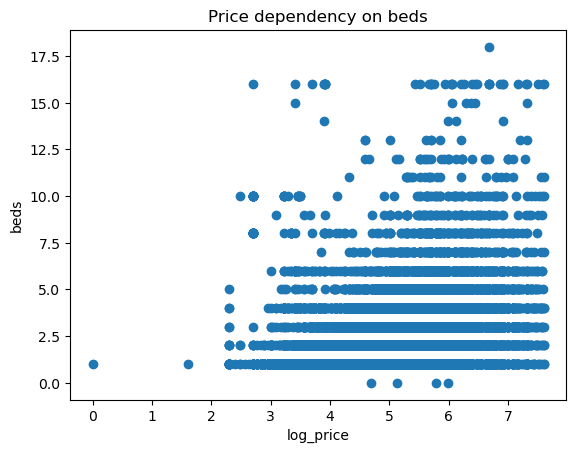

In [14]:
# scatter plot
plt.scatter(y='beds',x='log_price',data=df)
plt.title('Price dependency on beds')
plt.xlabel('log_price')
plt.ylabel('beds')
plt.show()

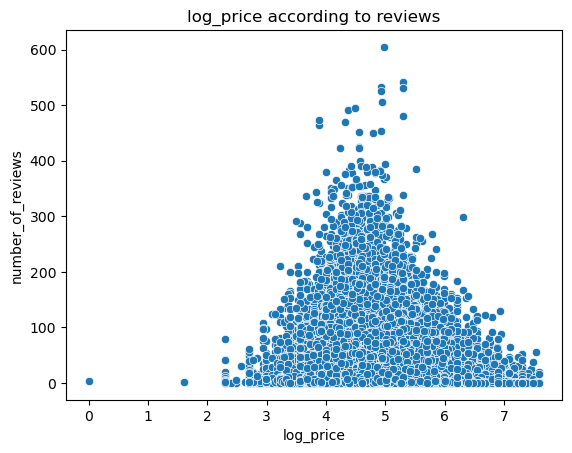

In [15]:
sns.scatterplot(y="number_of_reviews",x="log_price",data=df)
plt.title('log_price according to reviews')
plt.show()

In [16]:
# Identify outliers in 'log_price' using IQR
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['log_price'] < lower) | (df['log_price'] > upper)]
print("Number of price outliers:", outliers.shape[0])

Number of price outliers: 1532


Data Preprocessing

In [18]:
# Encode categorical variables
cols=['property_type','room_type','city','bed_type','cancellation_policy','instant_bookable']

le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])

In [19]:
# Encode boolean column seperataly
df['cleaning_fee'] = df['cleaning_fee'].map({True: 1, False: 0})

In [20]:
# Features and target
x=df[['property_type','room_type','number_of_reviews','latitude','instant_bookable','bed_type',
     'beds','bathrooms','bedrooms','accommodates','cleaning_fee']]

y=df['log_price']

In [21]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

Feature Scaling as data is not distributed normally

In [23]:
# Feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
# Linear regtression model
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
# Display accuracy and performance metrics
r2=r2_score(y_test,y_pred)
print(f'R2_score: {r2*100:.2f}')

R2_score: 51.79


In [26]:
# support vector regressor model
svc=SVR()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
r2=r2_score(y_test,y_pred)

In [27]:
# Display accuracy and performance metrics
print(f'SVC R2_score: {r2*100:.2f}')

SVC R2_score: 57.74


In [29]:
# randomforestregressor model
rfc=RandomForestRegressor(n_estimators=600)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
r2=r2_score(y_test,pred)

In [31]:
# Display accuracy and performance metrics
print(f'RandomForestregressor R2_score: {r2*100:.2f}')

RandomForestregressor R2_score: 60.39


In [ ]:
# video link

# https://drive.google.com/file/d/1DnlMEo6evWYagk_mj840u-vgX_ynbC9d/view?usp=drivesdk 